In [3]:
import pandas as pd
df_DABANG = pd.read_csv('DABANG.csv')
df_BRAND = pd.read_csv('COLIVING_trans.csv')

In [4]:
df_DABANG[:2]

,Unnamed: 0,_id,title,roomName,gender,roomType,py,deposit,rentFee,region,brandType,roomOption,url,imgUrl
0,0,65daa6126a079dcae275c4e4,매물번호 42074288,매물번호 42074288,0,0,19.83,10000000,560000,신림동,0,벽걸이형 책상 옷장 신발장 냉장고 세탁기 싱크대 인덕션 전자레인지 화재경보기 비디오...,https://www.dabangapp.com/room/65cb0d5768ba5a6...,https://d1774jszgerdmk.cloudfront.net/1024/uCt...
1,1,65daa6156a079dcae275c4e5,매물번호 42051547,매물번호 42051547,0,1,26.32,20000000,750000,수유동,0,벽걸이형 침대 신발장 냉장고 세탁기 싱크대 가스레인지 TV,https://www.dabangapp.com/room/65caca7b9d7b5a0...,https://d1774jszgerdmk.cloudfront.net/1024/uCt...


In [5]:
df_BRAND[:2]

,Unnamed: 0,_id,title,roomName,gender,roomType,py,deposit,rentFee,region,brandType,roomOption,url,imgUrl,station,station_region
0,0,65dc3805fbdcd7489dc7823b,하품 SKY,SKY,공용,1인실,65.6,50000000,450000,교대역,하품,"천장형 냉난방 에어컨\n바닥 난방 시스템\n원목 수납 침대(SS), 매트리스\n오픈...",https://www.hapoom.co/gyodae-co-living,https://static.wixstatic.com/media/acb830_03ba...,교대,서초동
1,1,65dc3805fbdcd7489dc7823c,하품 ROUND,ROUND,공용,1인실,26.0,30000000,780000,교대역,하품,수납형 싱글 침대\n매트리스 \n책상\n의자\n옷장\n수납장\n바닥 난방 시스템\n...,https://www.hapoom.co/gyodae-co-living,https://mblogthumb-phinf.pstatic.net/MjAyMTExM...,교대,서초동


## 양적인 분석 vs 질적인 분석의 차이
- 자본주의 -> 가격이 저렴한 매물에 집중한다.
- 질적인 -> 브랜드 커뮤니티 -> 비싸더라도 들어간다.

- 고객수 * 매물의 가격 을 통해 매출 규모를 알아본다.
- 일반부동산 가격 평균 * 자본주의사람들 = 매출 시장규모
- 브랜드 가격 평균 * 질적인 사람들 = 매출 시장규모

In [6]:
DABANG_deposit_mean = df_DABANG['deposit'].mean()
DABANG_rentFee_mean = df_DABANG['rentFee'].mean()

In [7]:
DABANG_deposit_mean, DABANG_rentFee_mean

(18641389.89169675, 533339.3501805054)

In [8]:
BRAND_deposit_mean = df_BRAND['deposit'].mean()
BRAND_rentFee_mean = df_BRAND['rentFee'].mean()

In [9]:
BRAND_deposit_mean, BRAND_rentFee_mean

(7083333.333333333, 906250.0)

- 22년 1인가구는 전체 가구의 34.5%인 750만 2천 가구이다.
- 총 1인가구 750만 가구 중 5%정도가 우리 사이트를 이용하고, -> 약 37.5만 가구
- 그 중 0.5%가 계약을 할 것이라고 가정한다.                             -> 약 1875 가구

- MZ세대의 코리빙하우스에 대한 관심이 늘어나고 있다.
- MZ세대란, 1980년~2012년에 태어난 세대를 말한다.
- 80년대생이 22년 기준 42세이므로 -> 30대(39세)까지 라고 가정한다.
- 22년 연령대별 1인가구는 29세 이하 19.2%, 30대 17.3% -> 총 36.5% 이다.
-> 1876가구 중 MZ세대 36.5%는 684가구
-> MZ세대가 아닌 가구는 1192가구


- DABANG_deposit_mean, DABANG_rentFee_mean * 1191 = 매출시장규모
- BRAND_deposit_mean, BRAND_rentFee_mean * 684 = 매출시장규모

In [19]:
df_deposit_result = pd.DataFrame({
    'common_deposit': [DABANG_deposit_mean * 1191],
    'MZ_deposit': [BRAND_deposit_mean * 684]
})
df_rentFee_result = pd.DataFrame({
    'common_rentFee': [DABANG_rentFee_mean * 1191],
    'MZ_rentFee': [BRAND_rentFee_mean * 684]
})

In [20]:
pd.options.display.float_format = '{:.2f}'.format
df_deposit_result

,common_deposit,MZ_deposit
0,22201895361.01,4845000000.00


In [21]:
df_rentFee_result

,common_rentFee,MZ_rentFee
0,635207166.06,619875000.00


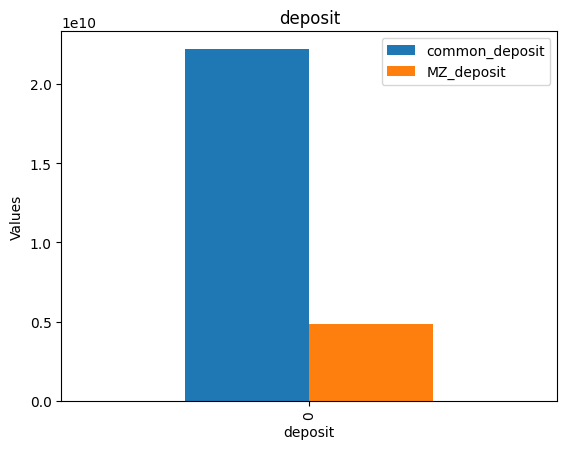

In [26]:
import matplotlib.pyplot as plt
df_deposit_result.plot(kind='bar')
plt.title('deposit')
plt.xlabel('deposit')
plt.ylabel('Values')
plt.show()

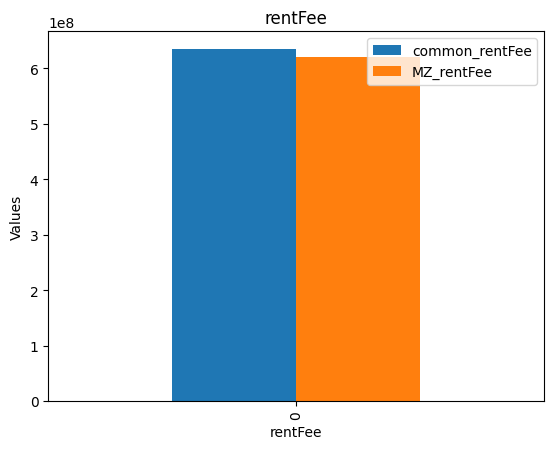

In [27]:
import matplotlib.pyplot as plt
df_rentFee_result.plot(kind='bar')
plt.title('rentFee')
plt.xlabel('rentFee')
plt.ylabel('Values')
plt.show()

- 보증금의 차이는 일반 사람들이 약 4배 더 높게 나타난다.
- MZ세대의 가구 수가 일반 사람들보다 약 2배 정도 적음에도 불구하고 월세 규모가 비슷하다.
-> 코리빙하우스의 보증금은 저렴한 반면, 월세는 높다.

- 비싼 값을 내고서라도 코리빙하우스에 입주하는 메리트는 일반 부동산과 다른 점인  공용공간, 브랜드마다의 고유 커뮤니티, 프로그램 등을 운영하기 때문이라고 생각됨.